In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
%matplotlib inline

In [2]:
df0=pd.read_excel('POL Daten.xlsx',sheet_name='3 PC')
df=df0.copy(deep=True)
df0.head()

,time,voltage,voltage2
0,0.000,-0.01,-0.01
1,0.002,-0.02,-0.01
2,0.004,-0.01,0.00
3,0.006,-0.02,-0.01
4,0.008,-0.02,-0.01


<AxesSubplot:xlabel='time'>

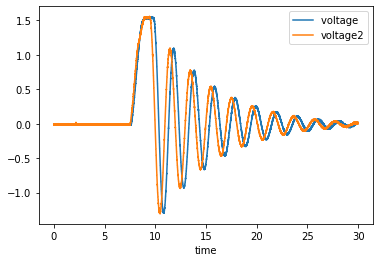

In [3]:
df0.plot(x='time')

# Voltage first measurement

array([ 0.15905132,  3.02524113, -1.87651271])

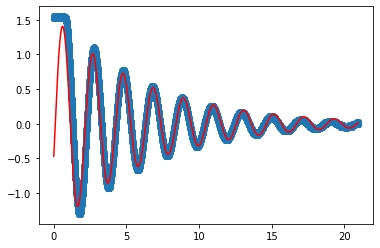

In [55]:
title='voltage '
i=0
t=df['time'] #define x data
phi=df[title].dropna() 
max_pos=df.idxmax() #finding index of maximum for each dataset
max_pos=max_pos[1:] #getting rid of max for the time column
phi0=df[title][max_pos[i]] #setting phi0 as maximum of function
phi=phi[max_pos[i]:] #making y data start at maximum
phi=phi.reset_index(drop=True) #resets index of phi, useful for while loop otherwise difficult to call elements
count=0
while (phi[0]-phi[1])<(phi[0]/100):
    del phi[0]
    phi=phi.reset_index(drop=True) #have to reset it every time
    count+=1
t_max=t[max_pos[i]] #need to shift the t to zero to get a good fit so we need t value of starting point
t=t[max_pos[i]+count:] #making x data start at max of y
t-=t_max
t=t.reset_index(drop=True)
if len(t)!= len(phi): #just making sure that x and y have the same length
    t=t[:len(phi)]
def func(t, lam, omega, beta): #defining ,my function here after finding Phi0, otherwise have to use lambda funct to 
    #pass parameter i think
    return phi0*np.exp(-lam*t)*np.cos(omega*t+beta)
popt, pcov = curve_fit(func, t, phi,maxfev=5000) #this is just fitting, we are interested in the first to things that popt returns
lambdat,omegat,betat=popt[0],popt[1],popt[2] #assigning a bit of stuff to make the code more readable
plt.plot(t,func(t, lambdat,omegat,betat),c='red')
plt.scatter(t,phi)
popt

# Voltage second measurement

(array([ 0.16220781,  3.10187599, -1.1737722 ]),
 array([[ 1.32862002e-07,  1.32707489e-10, -1.25658528e-09],
        [ 1.32707489e-10,  2.87188434e-07, -9.25918084e-07],
        [-1.25658528e-09, -9.25918084e-07,  5.56710636e-06]]))

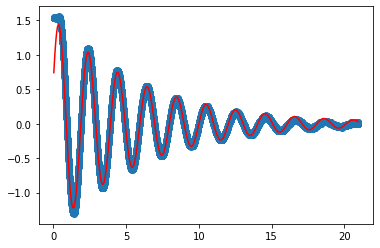

In [56]:
title='voltage2'
i=0
t2=df['time'] #define x data
phi2=df[title].dropna() 
max_pos=df.idxmax() #finding index of maximum for each dataset
max_pos=max_pos[1:] #getting rid of max for the time column
phi02=df[title][max_pos[i]] #setting phi0 as maximum of function
phi2=phi2[max_pos[i]:] #making y data start at maximum
phi2=phi2.reset_index(drop=True) #resets index of phi, useful for while loop otherwise difficult to call elements
count=0
while (phi2[0]-phi2[1])<(phi2[0]/100):
    del phi2[0]
    phi2=phi2.reset_index(drop=True) #have to reset it every time
    count+=1
t2_max=t2[max_pos[i]] #need to shift the t to zero to get a good fit so we need t value of starting point
t2=t2[max_pos[i]+count:] #making x data start at max of y
t2-=t2_max
t2=t2.reset_index(drop=True)
if len(t2)!= len(phi2): #just making sure that x and y have the same length
    t2=t2[:len(phi2)]
def func(t, lam, omega, beta): #defining ,my function here after finding Phi0, otherwise have to use lambda funct to 
    #pass parameter i think
    return phi02*np.exp(-lam*t)*np.cos(omega*t+beta)
popt, pcov = curve_fit(func, t2, phi2,maxfev=5000) #this is just fitting, we are interested in the first to things that popt returns
lambdat2,omegat2,betat2=popt[0],popt[1],popt[2] #assigning a bit of stuff to make the code more readable
plt.plot(t2,func(t2, lambdat2,omegat2,betat2),c='red')
plt.scatter(t2,phi2)
popt, pcov

In [6]:
max_pos2=df.idxmax() #needed for the amplitude of the first max since find_peaks is not finding it
max_pos2

time        15000
voltage      4527
voltage2     4715
dtype: int64

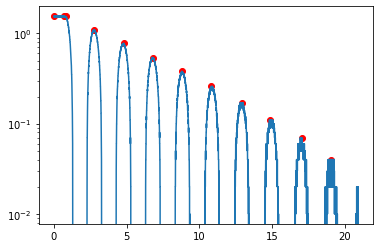

In [61]:
title='voltage '
peaks,prop=find_peaks(phi,prominence=0.02,distance=300,height=0.04)
plt.plot(t,phi)
x,y=[t[400]],[phi[0]]
for pos in peaks:
    x.append(t[pos])
    y.append(phi[pos])
plt.scatter(x,y,c='red')
plt.yscale('log')

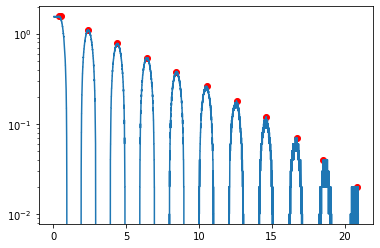

In [52]:
title='voltage2'
peaks,prop=find_peaks(phi2,prominence=0.01,distance=300)
plt.plot(t2,phi2)
x2,y2=[t2[250]],[phi2[0]]
for pos in peaks:
    x2.append(t2[pos])
    y2.append(phi2[pos])
plt.scatter(x2,y2,c='red')
plt.yscale('log')